In [1]:
# notebooks/explore_data.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Charger les données nettoyées
df = pd.read_csv("../data/processed/bitcoin_processed.csv", parse_dates=['ds'])

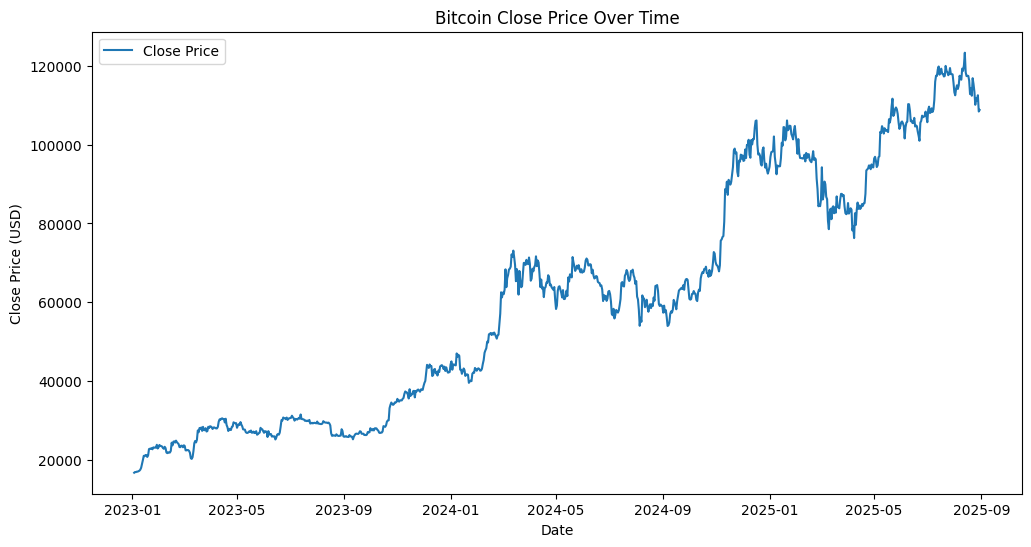

In [3]:
# 1. Visualiser la série temporelle (Close)
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

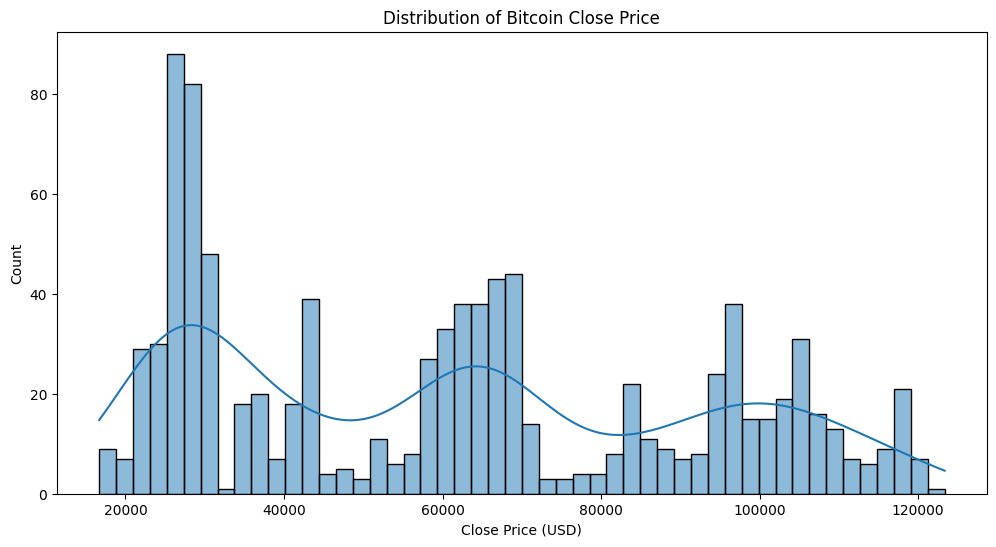

In [4]:
# 2. Vérifier la distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['y'], bins=50, kde=True)
plt.title('Distribution of Bitcoin Close Price')
plt.xlabel('Close Price (USD)')
plt.show()

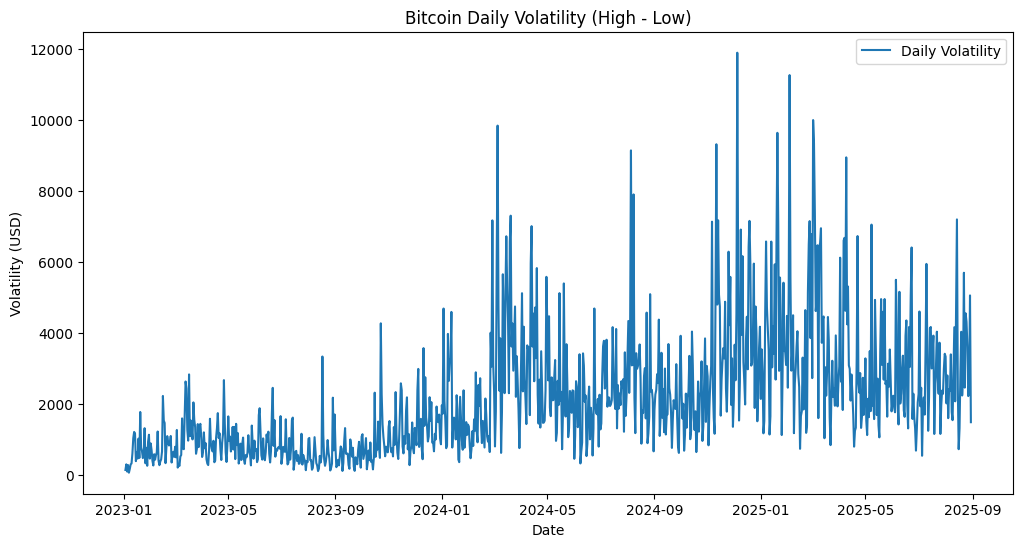

In [5]:
# 3. Vérifier la volatilité (optionnel, si tu as raw data)
raw_df = pd.read_csv("../data/raw/bitcoin_data.csv", skiprows=3, header=None,
                     names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'],
                     parse_dates=['Date'], on_bad_lines='skip')
raw_df['Volatility'] = raw_df['High'] - raw_df['Low']
plt.figure(figsize=(12, 6))
plt.plot(raw_df['Date'], raw_df['Volatility'], label='Daily Volatility')
plt.title('Bitcoin Daily Volatility (High - Low)')
plt.xlabel('Date')
plt.ylabel('Volatility (USD)')
plt.legend()
plt.show()

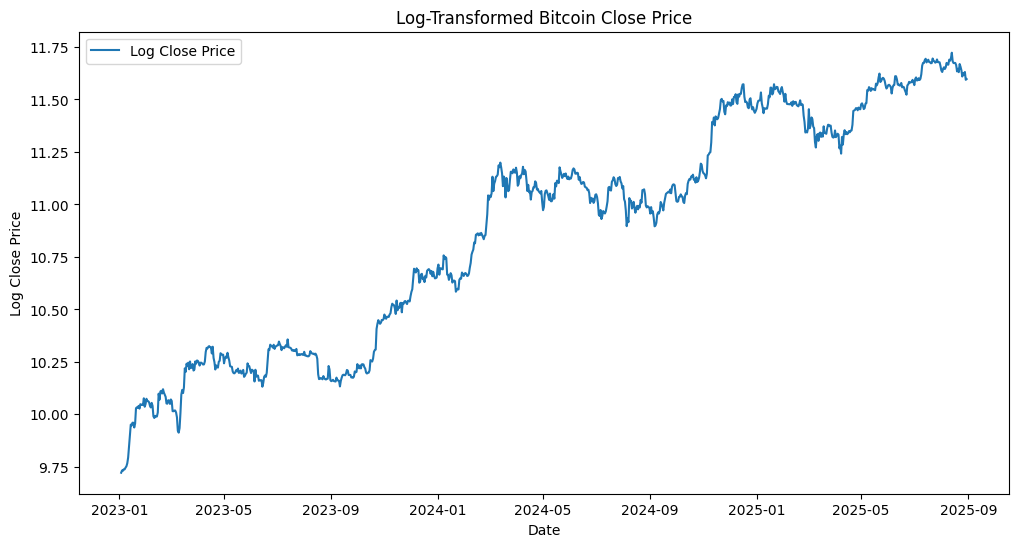

Valeurs manquantes :
 ds       0
y        0
log_y    0
dtype: int64


In [6]:
# 4. Optionnel : Log-transformation pour voir l’effet
df['log_y'] = np.log(df['y'])
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['log_y'], label='Log Close Price')
plt.title('Log-Transformed Bitcoin Close Price')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.legend()
plt.show()

# 5. Vérifier les valeurs manquantes
print("Valeurs manquantes :\n", df.isnull().sum())